### <b>Project 1 - part 2 - Jeremiah Pagan </b>
***
**(1)** Take a picture of your face or have a friend do it. <br>
**(2)** Import the image into Jupyter Notebook. <br>
**(3)** Analyze the image. <br>
**(4)** Create a histogram of the whole image. <br>
**(5)** Modify your image with brightness and contrast so it fills the complete tonal range. <br>
**(6)** Create a mask of your face. <br>
**(7)** Use the mask to create a HSV histogram. <br>
**(8)** Analyze the histogram for skin tone ranges. <br>
**(9)** Use the HSV ranges to create a mask of skin tones. <br>
**(10)** Apply the mask to the image and segment out your skin/face. <br>
For the last two steps in the pipeline, you will need to use cv2.bitwise_and and cv2.inRange. Read the documentation to understand the inputs that both functions accept and what they accomplish.

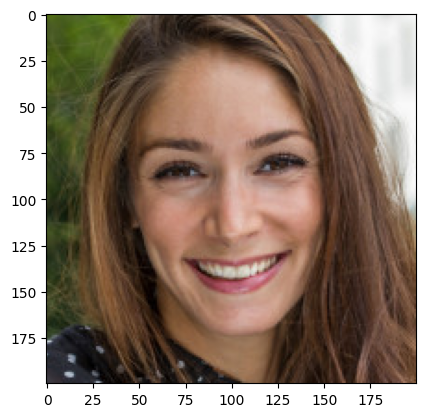

In [55]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel.
img = cv2.imread("../images/stockFace.jpg", 1)

# OpenCV by default uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


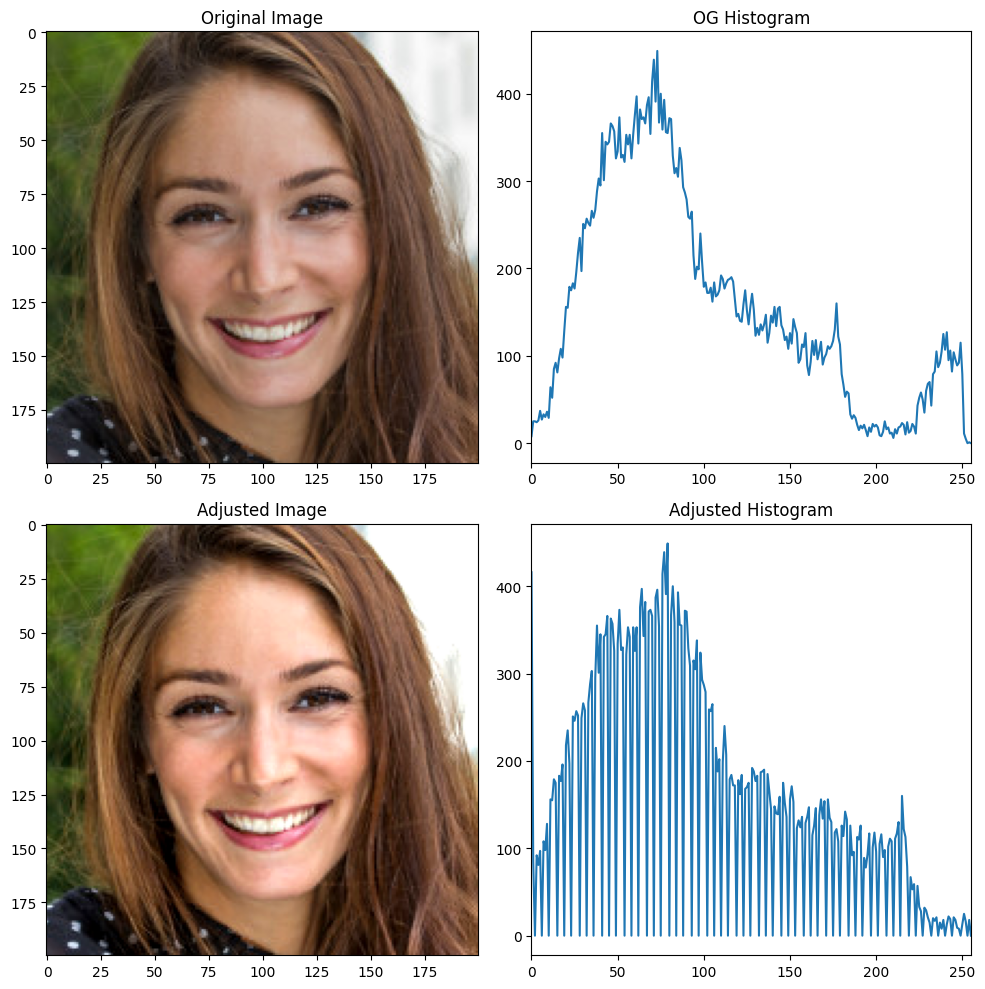

In [56]:
# The brightness/contrast function from class. You can also use OpenCV's built-in function cv2.convertScaleAbs()
def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')
    
    # Adjust contrast
    temp *= alpha
    
    # Adjust brightness
    temp += beta
    
    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)
    
    return temp.astype('uint8')

# read the image, Put the path to your file.
img_color = cv2.imread("../images/stockFace.jpg")

# Convert to RGB frm BGR.
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Convert to black and white to calculate the brightness histogram.
img_bw = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
hist = cv2.calcHist([img_bw],[0],None,[256],[0,255])

# Adjust brightness and contrast on both the color and bw.  Monitor the black and white histogram.
contrast = 1.3
brightness = -15
adjusted_img_color = adjust_brightness_contrast(img_color, contrast, brightness) 
adjusted_img_bw = adjust_brightness_contrast(img_bw, contrast, brightness)

# Calculate histogram of adjusted image bw
adjusted_hist = cv2.calcHist([adjusted_img_bw],[0],None,[256],[0,255]) 

# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.imshow(img_color)
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('OG Histogram')

plt.subplot(2, 2, 3)
plt.imshow(adjusted_img_color, vmin=0, vmax=255)
plt.title('Adjusted Image')

plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

plt.tight_layout()
plt.show()



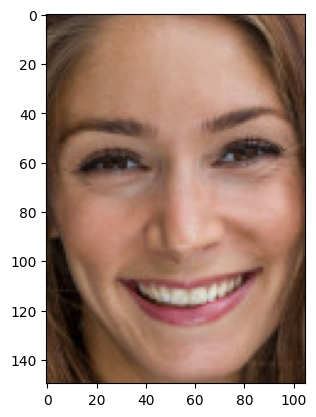

In [57]:
# Import the face image.
img = cv2.imread('../images/stockFace.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_masked = img[25:175, 45:150]

# Plot the masked image.
plt.imshow(img_masked)

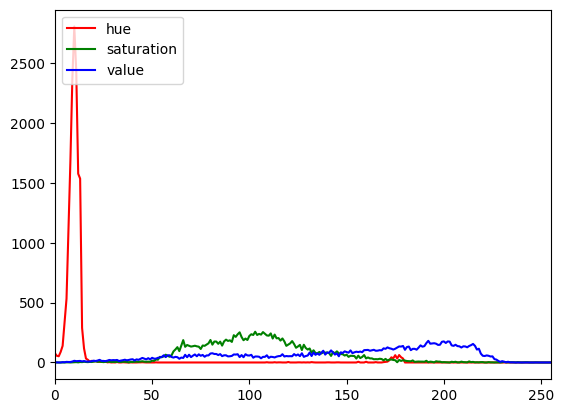

In [58]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()


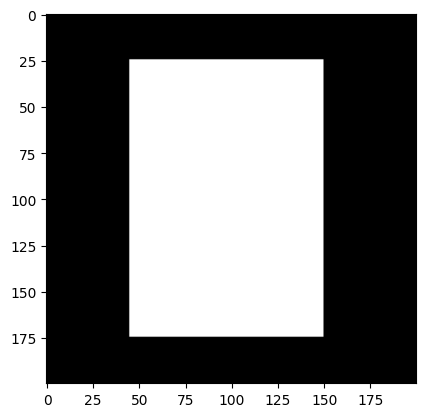

In [59]:
#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.
mask[25:175, 45:150] = 255

# Plot mask. Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask, cmap="gray")

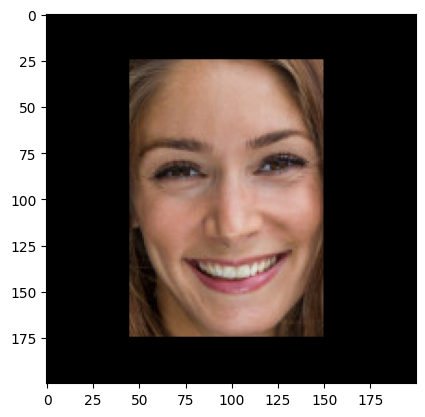

In [60]:
# Let's add our mask to our image.

# Import the face image again.
img = cv2.imread("../images/stockFace.jpg")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)

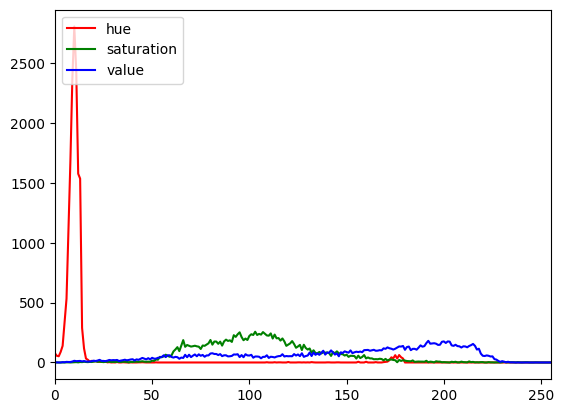

In [61]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

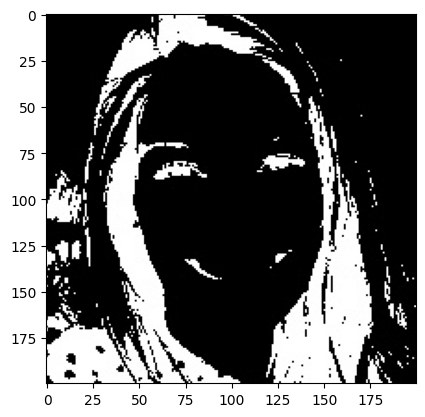

In [62]:
# Code from https://www.educba.com/opencv-inrange/
# Import the face image.
img = cv2.imread("../images/stockFace.jpg")

#defining the lower bounds and upper bounds
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([350,55,100])

#masking the image using inRange() function
imagemask = cv2.inRange(img, lower_bound, upper_bound)

# Create the masked image.
cv2.imwrite("../images/stockFace2.jpg", imagemask)

# Import the masked image.
img2 = cv2.imread("../images/stockFace2.jpg")
plt.imshow(img2)
